In [56]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de datos

In [57]:
data_train=pd.read_csv('202510_Laboratorio 1 - Regresión_train_data.csv')

In [58]:
data_train.sample(5)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
521,1237648705679720625,249.383472,0.878946,17.33858,16.08158,15.54829,15.32165,15.29076,752,6,707,0.849569,1,STAR,0.000177,51671,0.001732,-0.004940
389,1237648720688578746,167.946931,-0.589748,19.06807,17.87498,17.24703,16.87582,16.63868,756,2,348,0.866652,0,GALAXY,0.083437,51900,0.003976,0.001547
2546,1237648721755177075,151.635296,0.336511,18.95390,17.22803,16.37891,15.94198,15.62841,756,4,239,0.884517,1,GALAXY,0.089243,51910,-0.003274,0.004190
2018,1237648721757077638,155.883046,0.349157,19.07018,17.73820,17.03980,16.61937,16.34582,756,4,268,0.892298,1,GALAXY,0.096318,51941,-0.001493,-0.004355
1064,1237648704052592668,211.666335,-0.357285,19.30768,17.50772,16.56380,16.12247,15.74522,752,3,455,0.864704,1,GALAXY,0.113011,51688,-0.003940,-0.010881


# Limpieza de datos
## Completitud

No hay datos nulos en ninguna columna del dataframe por lo tanto estan completos.

In [59]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   objid     4000 non-null   int64  
 1   ra        4000 non-null   float64
 2   dec       4000 non-null   float64
 3   u         4000 non-null   float64
 4   g         4000 non-null   float64
 5   r         4000 non-null   float64
 6   i         4000 non-null   float64
 7   z         4000 non-null   float64
 8   run       4000 non-null   int64  
 9   camcol    4000 non-null   int64  
 10  field     4000 non-null   int64  
 11  score     4000 non-null   float64
 12  clean     4000 non-null   int64  
 13  class     4000 non-null   object 
 14  redshift  4000 non-null   float64
 15  mjd       4000 non-null   int64  
 16  rowv      4000 non-null   float64
 17  colv      4000 non-null   float64
dtypes: float64(11), int64(6), object(1)
memory usage: 562.6+ KB


## Duplicidad

Se verifica que hay duplicidad completa en 17 columnas y posteriormente se eliminan.

In [60]:
data_train[data_train.duplicated(keep=False)]

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
88,1237648703513428079,206.374167,-0.781673,18.28101,17.18856,16.70175,16.33173,16.14626,752,2,420,0.904768,1,GALAXY,0.088136,51943,-0.002860,0.001156
109,1237648721231609897,182.015940,-0.116600,17.96686,16.91550,16.75447,16.68648,16.70880,756,3,442,0.876962,1,S,-0.000066,51615,-0.000639,0.000270
114,1237646382079606869,94.679499,0.842321,18.47695,16.94897,16.68126,16.59887,16.51747,211,6,359,0.806204,1,STAR,0.000207,52931,0.000372,-0.001017
299,1237648721756225804,154.036159,0.417930,19.50457,18.08980,17.29931,16.88134,16.56668,756,4,255,0.892071,1,GALAXY,0.096783,51883,-0.000413,-0.002812
629,1237648720687988788,166.623017,-0.546630,19.55528,17.73928,16.86703,16.44810,16.11761,756,2,339,0.879096,1,GALAXY,0.086721,51900,0.001004,-0.001857
642,1237648720715710772,229.932143,-0.607750,18.34448,17.39741,17.08713,16.86085,16.67511,756,2,762,0.846381,1,GALAXY,0.037010,51689,0.004917,-0.009145
718,1237648721789780467,230.664376,0.229439,19.48961,18.21590,17.50523,17.09294,16.87079,756,4,767,0.872553,1,GALAXY,0.112827,51673,0.008122,0.012494
719,1237648721788993889,228.864817,0.317359,18.88618,17.66549,17.09694,16.72708,16.56451,756,4,755,0.881142,1,GALAXY,0.082665,51689,-0.003803,-0.000683
856,1237648705679065271,247.896821,0.990909,16.74659,15.61752,15.43460,15.40196,15.40794,752,6,697,0.842783,1,STAR,0.000073,51671,0.002149,-0.000930
897,1237646382079672642,94.883887,0.990686,17.03847,15.47224,15.10297,14.97051,14.88297,211,6,360,0.806983,1,S,0.000012,52931,-0.001483,0.001376


In [61]:
#Se borran directamente del dataframe los registros duplicados completos
data_train=data_train.drop_duplicates(keep = "first", inplace= False,ignore_index =True)
data_train

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
0,1237648722306924571,185.574486,0.701402,19.11034,17.62099,17.03464,16.82993,16.71711,756,5,466,0.864145,1,STAR,8.780529e-05,54140,0.002418,0.001363
1,1237648720167436418,203.801841,-0.853906,18.90957,17.62940,17.01465,16.62059,16.35239,756,1,588,0.816541,1,GALAXY,8.619995e-02,51955,0.008650,0.007056
2,1237648720685105352,160.034264,-0.421626,19.26340,17.67693,16.82551,16.42307,16.13864,756,2,295,0.870381,1,GALAXY,1.330486e-01,51913,0.003938,-0.002028
3,1237648703510937836,200.807373,-0.682024,18.82022,17.77765,17.38575,17.11128,16.93540,752,2,382,0.867801,1,GALAXY,8.636355e-02,51959,0.001839,0.001160
4,1237648720161275992,189.792404,-1.001480,18.91391,19.05355,19.46278,19.75660,20.09613,756,1,494,0.833824,1,STAR,-4.090000e-08,54562,0.001929,-0.000465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,1237648720690741273,172.826005,-0.484303,18.81890,17.89273,17.54372,17.41363,17.31821,756,2,381,0.887803,1,STAR,1.521540e-04,54891,0.000675,0.000324
3979,1237649918427267086,11.165126,13.745240,17.46665,15.96142,15.36014,15.14572,15.04453,1035,1,38,0.844826,1,STAR,4.182837e-05,53242,-0.000440,-0.000301
3980,1237648720164684046,197.579529,-0.971573,19.45682,18.32555,17.86916,17.57512,17.41648,756,1,546,0.819151,1,GALAXY,8.160563e-02,51985,0.011348,0.005854
3981,1237648721206575779,124.877626,-0.048110,19.20158,17.31450,16.36573,15.91760,15.57736,756,3,60,0.894044,1,GALAXY,8.744828e-02,55888,-0.004486,-0.006072


In [62]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   objid     3983 non-null   int64  
 1   ra        3983 non-null   float64
 2   dec       3983 non-null   float64
 3   u         3983 non-null   float64
 4   g         3983 non-null   float64
 5   r         3983 non-null   float64
 6   i         3983 non-null   float64
 7   z         3983 non-null   float64
 8   run       3983 non-null   int64  
 9   camcol    3983 non-null   int64  
 10  field     3983 non-null   int64  
 11  score     3983 non-null   float64
 12  clean     3983 non-null   int64  
 13  class     3983 non-null   object 
 14  redshift  3983 non-null   float64
 15  mjd       3983 non-null   int64  
 16  rowv      3983 non-null   float64
 17  colv      3983 non-null   float64
dtypes: float64(11), int64(6), object(1)
memory usage: 560.2+ KB


No encontramos ningun duplicado parcial de objid, el cual debe ser un valor unico

In [63]:
data_train[data_train.duplicated(subset = 'objid', keep = False)].sort_values('objid')

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv


## Consistencia
Se encuentran inconsistencias con los valores que pertenecen a la columna class. Se implementa una correccion de estos.

In [64]:
data_train['class'].unique()

array(['STAR', 'GALAXY', 'QSO', 'S', 'QUASAR', 'G'], dtype=object)

In [65]:
data_train['class'] = data_train['class'].replace('S','STAR')
data_train['class'] = data_train['class'].replace('QUASAR','QSO')
data_train['class'] = data_train['class'].replace('G','GALAXY')

In [66]:
data_train['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

## Estandarizacion
Teniendo en cuenta que class es una clase categorica, se decidio usar One Hot Encoder para trabajar mejor con esa variable posteriormente, teniendo en cuenta la correlacion entre los tre valores que podian tomar en class.

In [67]:
# Inicializar el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Ajustar y transformar los datos categóricos
encoded_df = pd.DataFrame(encoder.fit_transform(data_train[['class']]))

# Agregar nombres a las columnas codificadas
encoded_df.columns = encoder.get_feature_names_out(['class'])

# Concatenar el DataFrame original con el DataFrame codificado
final_df = pd.concat([data_train, encoded_df], axis=1).drop(['class'], axis=1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   objid         3983 non-null   int64  
 1   ra            3983 non-null   float64
 2   dec           3983 non-null   float64
 3   u             3983 non-null   float64
 4   g             3983 non-null   float64
 5   r             3983 non-null   float64
 6   i             3983 non-null   float64
 7   z             3983 non-null   float64
 8   run           3983 non-null   int64  
 9   camcol        3983 non-null   int64  
 10  field         3983 non-null   int64  
 11  score         3983 non-null   float64
 12  clean         3983 non-null   int64  
 13  redshift      3983 non-null   float64
 14  mjd           3983 non-null   int64  
 15  rowv          3983 non-null   float64
 16  colv          3983 non-null   float64
 17  class_GALAXY  3983 non-null   float64
 18  class_QSO     3983 non-null 

In [68]:
final_df.sample(5)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv,class_GALAXY,class_QSO,class_STAR
2661,1237648720686415913,163.028252,-0.560794,15.61552,13.78314,12.90478,12.43369,12.10420,756,2,315,0.876567,1,0.018466,51909,-0.000564,0.000017,1.0,0.0,0.0
1084,1237648721790959986,233.368020,0.302805,18.78416,17.86670,17.58874,17.33640,17.22265,756,4,785,0.862957,0,0.082418,51989,-0.017243,0.009510,1.0,0.0,0.0
598,1237648720718594208,236.505142,-0.441683,19.27392,17.90999,17.37331,17.17907,17.07432,756,2,806,0.828319,1,-0.000377,51691,0.000567,0.001080,0.0,0.0,1.0
3796,1237648703516311814,213.065007,-0.633023,17.28403,15.63975,14.72320,14.20372,13.77550,752,2,464,0.854008,1,0.025591,51615,-0.011476,0.011959,1.0,0.0,0.0
3468,1237648702970593481,192.863201,-1.050101,19.23724,17.32182,16.33003,15.90236,15.54730,752,1,329,0.850319,1,0.094147,51609,0.002412,-0.002990,1.0,0.0,0.0


## Modelo

Se quiere generar una regresion así:

$$y_i = \beta_0+ \sum_{i=0}^{n} \beta_i \cdot x_i$$

Donde $y_i$ es redshift y $x_i$ son las características elejidas

## Elección de variables

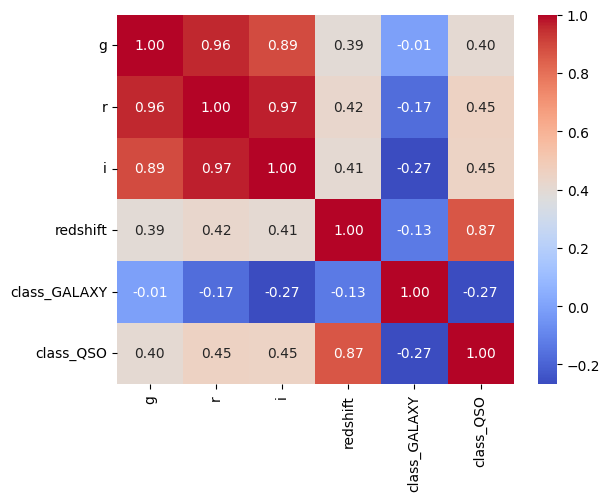

<Figure size 2000x1200 with 0 Axes>

In [69]:
sns.heatmap(final_df.drop(columns=['rowv','colv','clean','score','field','camcol','dec','class_STAR','objid','mjd','run','ra','u','z']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(20,12))
plt.show()

In [70]:
final_df[final_df['redshift'].isna()== False]

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv,class_GALAXY,class_QSO,class_STAR
0,1237648722306924571,185.574486,0.701402,19.11034,17.62099,17.03464,16.82993,16.71711,756,5,466,0.864145,1,8.780529e-05,54140,0.002418,0.001363,0.0,0.0,1.0
1,1237648720167436418,203.801841,-0.853906,18.90957,17.62940,17.01465,16.62059,16.35239,756,1,588,0.816541,1,8.619995e-02,51955,0.008650,0.007056,1.0,0.0,0.0
2,1237648720685105352,160.034264,-0.421626,19.26340,17.67693,16.82551,16.42307,16.13864,756,2,295,0.870381,1,1.330486e-01,51913,0.003938,-0.002028,1.0,0.0,0.0
3,1237648703510937836,200.807373,-0.682024,18.82022,17.77765,17.38575,17.11128,16.93540,752,2,382,0.867801,1,8.636355e-02,51959,0.001839,0.001160,1.0,0.0,0.0
4,1237648720161275992,189.792404,-1.001480,18.91391,19.05355,19.46278,19.75660,20.09613,756,1,494,0.833824,1,-4.090000e-08,54562,0.001929,-0.000465,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,1237648720690741273,172.826005,-0.484303,18.81890,17.89273,17.54372,17.41363,17.31821,756,2,381,0.887803,1,1.521540e-04,54891,0.000675,0.000324,0.0,0.0,1.0
3979,1237649918427267086,11.165126,13.745240,17.46665,15.96142,15.36014,15.14572,15.04453,1035,1,38,0.844826,1,4.182837e-05,53242,-0.000440,-0.000301,0.0,0.0,1.0
3980,1237648720164684046,197.579529,-0.971573,19.45682,18.32555,17.86916,17.57512,17.41648,756,1,546,0.819151,1,8.160563e-02,51985,0.011348,0.005854,1.0,0.0,0.0
3981,1237648721206575779,124.877626,-0.048110,19.20158,17.31450,16.36573,15.91760,15.57736,756,3,60,0.894044,1,8.744828e-02,55888,-0.004486,-0.006072,1.0,0.0,0.0


In [71]:
final_df=final_df.drop(columns=['rowv','colv','clean','score','field','camcol','dec','class_STAR','objid','mjd','run','ra','u','z'])
final_df

,g,r,i,redshift,class_GALAXY,class_QSO
0,17.62099,17.03464,16.82993,8.780529e-05,0.0,0.0
1,17.62940,17.01465,16.62059,8.619995e-02,1.0,0.0
2,17.67693,16.82551,16.42307,1.330486e-01,1.0,0.0
3,17.77765,17.38575,17.11128,8.636355e-02,1.0,0.0
4,19.05355,19.46278,19.75660,-4.090000e-08,0.0,0.0
...,...,...,...,...,...,...
3978,17.89273,17.54372,17.41363,1.521540e-04,0.0,0.0
3979,15.96142,15.36014,15.14572,4.182837e-05,0.0,0.0
3980,18.32555,17.86916,17.57512,8.160563e-02,1.0,0.0
3981,17.31450,16.36573,15.91760,8.744828e-02,1.0,0.0


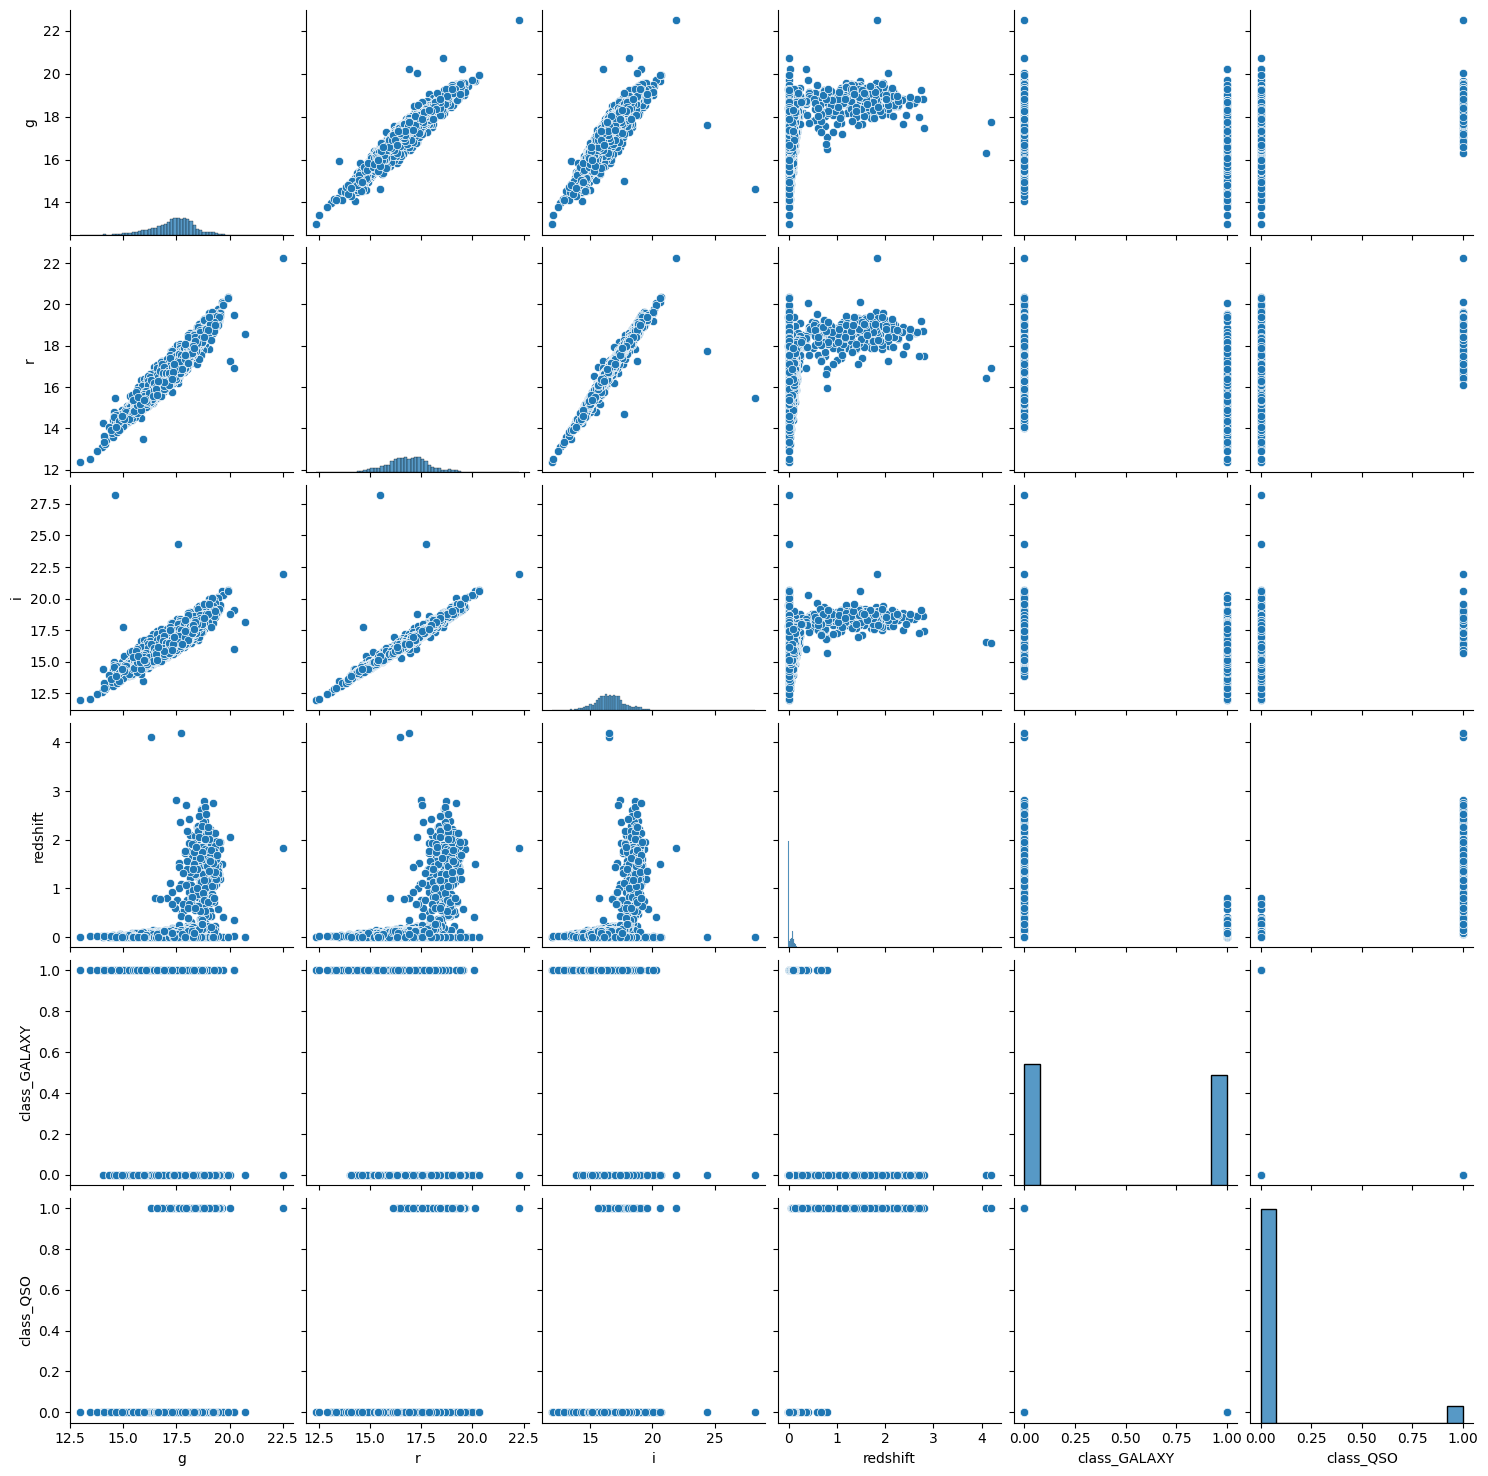

In [72]:
sns.pairplot(final_df, kind="scatter")

## Normalización datos

## Partición modelo

Para este modelo se uso una partición de 70-30:<br>
70% de los datos para entrenamiento y 30% para verificación.

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, final_df["redshift"], test_size=0.3, random_state=1)

In [74]:
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()
modelo.fit(X_train , y_train)

LinearRegression()

In [75]:
modelo.predict(final_df)

array([8.780529e-05, 8.619995e-02, 1.330486e-01, ..., 8.160563e-02,
       8.744828e-02, 2.131280e-04])

In [82]:
varDecision=["g","r","i","redshift","class_Galaxy","class_QSO"]
modelo.coef_

print("  Var Decisión | Coeficiente")
for i in range(0,len(modelo.coef_)):
    print("|  " + varDecision[i] + " : " + str(modelo.coef_[i]) + " |\n")

  Var Decisión | Coeficiente
|  g : 1.315357100159816e-16 |

|  r : -2.7755575615628914e-16 |

|  i : 2.1510571102112408e-16 |

|  redshift : 0.9999999999999997 |

|  class_Galaxy : -1.2013637697497193e-16 |

|  class_QSO : 1.0668549377257364e-16 |



In [ ]:
import sklearn.metrics as metrics

metrics.mean_squared_error(final_df.filter(['redshift']),modelo.predict(final_df))

2.194738006385079e-32